In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./data/df_tinder_anon_4140.csv", index_col=0)

In [3]:
df.sample(5).T

,2128,2475,3093,1297,577
age,23.0,23.0,26.0,24.0,19.0
is_selfie_verified,False,False,False,False,False
gender,NaN,NaN,F,F,NaN
schools,Universiteit van Amsterdam,Universiteit Maastricht,NaN,NaN,NaN
city,NaN,Maastricht,NaN,NaN,NaN
show_gender_on_profile,0.0,0.0,1.0,1.0,0.0
relationship_intent,Still figuring it out,Still figuring it out,NaN,"Long-term, open to short","Short-term, open to long"
sexual_orientations,Straight,NaN,NaN,NaN,NaN
hide_age,NaN,NaN,NaN,NaN,NaN
hide_distance,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4140 entries, 0 to 4139
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     4130 non-null   float64
 1   is_selfie_verified      4140 non-null   bool   
 2   gender                  814 non-null    object 
 3   schools                 2057 non-null   object 
 4   city                    2064 non-null   object 
 5   show_gender_on_profile  3775 non-null   float64
 6   relationship_intent     2794 non-null   object 
 7   sexual_orientations     415 non-null    object 
 8   hide_age                428 non-null    float64
 9   hide_distance           428 non-null    float64
 10  is_traveling            755 non-null    float64
 11  custom_gender           14 non-null     object 
 12  zodiac_sign             2456 non-null   object 
 13  height                  1039 non-null   float64
 14  education_level         1802 non-null   objec

In [5]:
df.isna().sum()

age                         10
is_selfie_verified           0
gender                    3326
schools                   2083
city                      2076
show_gender_on_profile     365
relationship_intent       1346
sexual_orientations       3725
hide_age                  3712
hide_distance             3712
is_traveling              3385
custom_gender             4126
zodiac_sign               1684
height                    3101
education_level           2338
relationship_type         3304
workout                   2656
professions               2746
company_name              3632
has_face                     0
dtype: int64

In [6]:
#df_parquet = pd.read_parquet("./data/df_tinder_anon_4140.parquet")
#df_parquet

In [7]:
percent_table = {"percent_has_gender": round(len(df[(df['gender'].notna())]) / len(df[[]]) * 100), 
                 "percent_has_sexual_orientations": round(len(df[(df['sexual_orientations'].notna())]) / len(df[[]]) * 100),
                 "percent_is_selfie_verified": round(len(df[(df['is_selfie_verified'] == True)]) / len(df[[]]) * 100),
                 "percent_all": round(len(df[(df['gender'].notna()) & 
                          (df['is_selfie_verified'] == True) &
                          (df['sexual_orientations'].notna())]) / len(df[[]]) * 100)}
percent_table

{'percent_has_gender': 20,
 'percent_has_sexual_orientations': 10,
 'percent_is_selfie_verified': 36,
 'percent_all': 2}

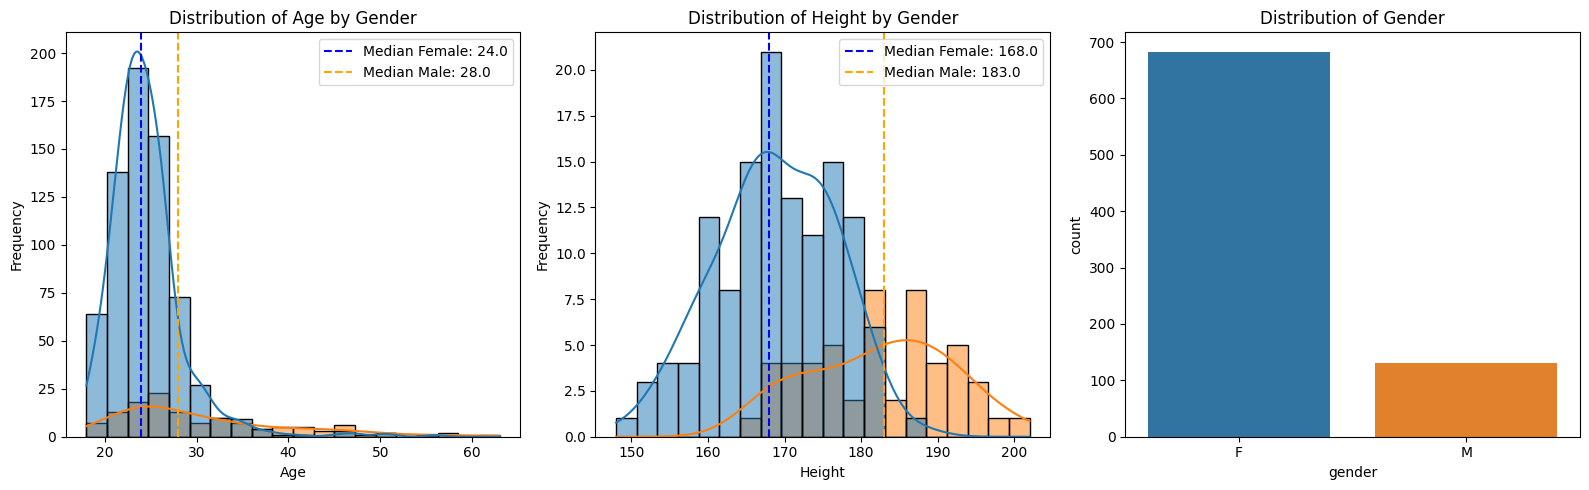

In [8]:
# Create charts for bar charts and pie charts
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))

# Histogram for "age" by sex
sns.histplot(data=df, x='age', bins=20, hue='gender', common_norm=False, ax=axes[0], kde=True)
medians = round(df.groupby('gender')['age'].median())
for gender, median_age in medians.items():
    color = 'orange' if gender == 'M' else 'blue'
    label = f'Median Male: {median_age}' if gender == 'M' else f'Median Female: {median_age}'
    axes[0].axvline(median_age, color=color, linestyle='--', label=label)
axes[0].set_title('Distribution of Age by Gender')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Histogram for "height" by sex
sns.histplot(data=df, x='height', bins=20, hue='gender', common_norm=False, ax=axes[1], kde=True)
medians = round(df.groupby('gender')['height'].median())
for gender, median_height in medians.items():
    color = 'orange' if gender == 'M' else 'blue'
    label = f'Median Male: {median_height}' if gender == 'M' else f'Median Female: {median_height}'
    axes[1].axvline(median_height, color=color, linestyle='--', label=label)
axes[1].set_title('Distribution of Height by Gender')
axes[1].set_xlabel('Height')
axes[1].set_ylabel('Frequency')
axes[1].legend()

# Pie chart for "gender"
sns.countplot(data=df, x='gender', ax=axes[2], )
axes[2].set_title('Distribution of Gender')

plt.tight_layout()
plt.show()


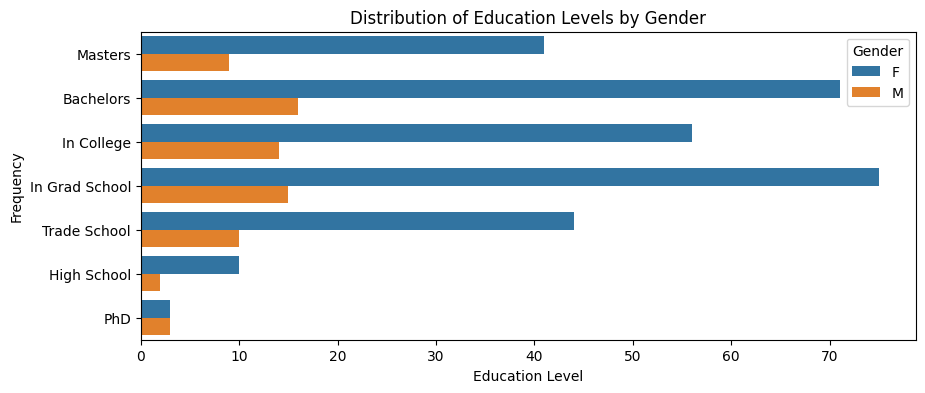

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Basic statistics for numeric features
numeric_features = ['age', 'height']
df[numeric_features].describe()

# Splitting data by gender and analyzing education levels
plt.figure(figsize=(10, 4))
sns.countplot(data=df, y='education_level', hue='gender')
plt.title('Distribution of Education Levels by Gender')
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.legend(title='Gender', loc='upper right')
plt.show()


In [10]:
pd.crosstab(df.workout, df.gender, margins=True)

gender,F,M,All
workout,,,
Everyday,11,4,15
Gym rat,7,1,8
Never,15,6,21
Occasionally,18,5,23
Often,92,23,115
Sometimes,73,24,97
All,216,63,279
